In [ ]:
import xarray as xr
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.tri as tri
import sys
sys.path.append('../src')


ImportError: cannot import name 'PRED_RES_DIR' from 'data_constants' (/Users/Julie/Desktop/wfrt_msc-thesis/sandbox/../src/data_constants.py)

In [ ]:
file_path = '../data/prediction_data/bris-lam-inference-20230101T12-20230102T12.nc'

In [ ]:
data = xr.open_dataset(file_path, engine='netcdf4')

In [ ]:
# for i in range(len(data.initial_date)):
#     print(i, data.isel(initial_date=i).values)
print(type(data.initial_date))
print(type(data['sp'].values))

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


In [ ]:
# List all variables in the file
# print("Variables:", list(data.variables))

# # Access a specific variable
variable_name = "2t"  # Replace with your variable name
temp = data[variable_name]
# print(temp)
# print(temp.shape)
# print(temp.values)

print(temp.dims)

temp_sel = temp.isel(lead_time=0, initial_date=0)
print('\n temp sel:')
print(temp_sel)
print(temp_sel.shape)
print(temp_sel.values)



# # Print the variable's data and attributes
# print(variable_data)
# print("Attributes:", variable_data.attrs)

# # sel 1 timestamp
# print(' - 1D date: ', data['2t'].isel(initial_date=0, lead_time=0).shape)
# print(data['latitude'].shape)
# print(data.initial_date[0].values)

# print(data.coords)
# print(data.dims)

# print(' - lead_time: ', data.lead_time)
# # print(' - lead_time: ', data.lead_time.values[3])
# print(' - lead_time: ', type(data.lead_time.values[3]))

# print(' - initial_dates: ', data.initial_date.values)

('initial_date', 'lead_time', 'values')

 temp sel:
<xarray.DataArray '2t' (values: 275716)> Size: 1MB
[275716 values with dtype=float32]
Coordinates:
    lead_time     int32 4B 0
    initial_date  datetime64[ns] 8B 2023-01-01T12:00:00
Dimensions without coordinates: values
Attributes:
    fill_value:  nan
(275716,)
[282.1684  282.1524  282.122   ... 255.7258  252.17288 252.27824]


In [ ]:
def show_stats(array):
    array = array.values
    print(' - max: ', array.max())
    print(' - min: ', array.min())
    print(' - mean: ', array.mean())
    print(' - std: ', array.std())

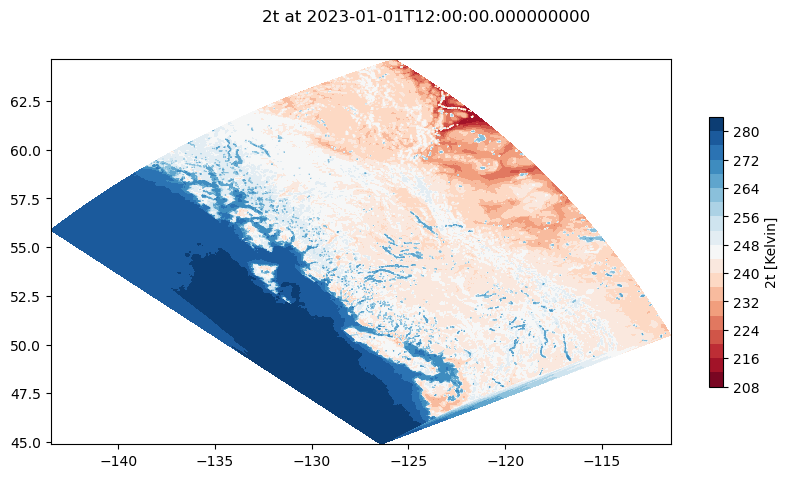

In [ ]:
DISP_VAR = '2t'
DATE = str(data.initial_date[0].values)

fig, ax = plt.subplots(figsize=(10,5))#, subplot_kw={"projection": ccrs.PlateCarree()})
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=":")

triangulation = tri.Triangulation(data['longitude'], data['latitude'])
contour=ax.tricontourf(triangulation, data[DISP_VAR].sel(initial_date=DATE, lead_time=12), levels=20, cmap="RdBu") #, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contour, ax=ax, orientation="vertical", shrink=0.7, label=f"{DISP_VAR} [Kelvin]")

# gl = ax.gridlines(
#     draw_labels=True,
#     linewidth=0.5,
#     color='gray',
#     alpha=0.5,
#     linestyle='--'
# )
# remove labels on top and right
# gl.top_labels = False
# gl.right_labels = False
fig.suptitle(f"{DISP_VAR} at {DATE}")
plt.savefig(f"../reports/plots/prediction/{DATE}_bris-inference_{DISP_VAR}.png")
plt.show()